In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import healpy as hp
import astropy 

In [2]:
# NOT USED HERE
#https://stackoverflow.com/questions/44443498/how-to-convert-and-save-healpy-map-to-different-coordinate-system
#Added notes by Marc Manera
def change_coord(m, coord):
    """ Change coordinates of a HEALPIX map

    Parameters
    ----------
    m : map or array of maps
      map(s) to be rotated
    coord : sequence of two character
      First character is the coordinate system of m, second character
      is the coordinate system of the output map. As in HEALPIX, allowed
      coordinate systems are 'G' (galactic), 'E' (ecliptic) or 'C' (equatorial)

    Example
    -------
    The following rotate m from galactic to equatorial coordinates.
    Notice that m can contain both temperature and polarization.
    >>>> change_coord(m, ['G', 'C'])
    """
    # Basic HEALPix parameters
    npix = m.shape[-1]
    nside = hp.npix2nside(npix)
    ang = hp.pix2ang(nside, np.arange(npix))

    # Select the coordinate transformation  
    # Marc Manera notes: REVERSED
    # We rotate the maps in reverse new -> old, instead of old -> new
    # because we are not changing the values of the pixels, but their indices!
    rot = hp.Rotator(coord=reversed(coord))

    # Convert the coordinates
    new_ang = rot(*ang)
    new_pix = hp.ang2pix(nside, *new_ang)

    return m[..., new_pix]



In [3]:
def rotate_map(hmap,coord):
    """
   Rotate a healpix map from galactic to equatorial, interpolating values.
   Adapted and notes by Marc Manera
   
    Parameters
    ----------
    hmap : healpix map (may not work for an array of maps)
      map(s) to be rotated
    coord : sequence of two character example coord = (['G','C']) 
      First character is the coordinate system of the input map, second character
      is the coordinate system of the output map. As in HEALPIX, allowed
      coordinate systems are 'G' (galactic), 'E' (ecliptic) or 'C' (equatorial)

   """
   # Obtain healpy rotator.
   # NOTE: MAPS REVERSED
   # We rotate the maps in reverse new -> old, instead of old -> new
   # because we are not changing the values of the pixels, but their indices!
    r = hp.Rotator(coord=reversed(coord))

   # Get theta, phi input coordinates
    nside = hp.npix2nside(len(hmap))
    th,ph = hp.pix2ang(nside, np.arange(hp.nside2npix(nside))) #theta, phi

   # Map onto coordinates by INVERSE ROTATIONÇ 
    throt, phrot = r(th,ph)
   # Interpolate the values of input map into an array of throt and phrot coordinates
   # This means, for healpix index 1 of new system 
   # I look where would the old coordinates be (thus inverse rotation)
   # and interpolate the values of the old map into the input position 
   # in the old coordinates, this would be indexed and new first value
   # thus result map is in the new coordinates, but by changing indices not values. 
    rot_map = hp.get_interp_val(hmap, throt, phrot)

    return rot_map

In [4]:
# NOT USED ---- I could read healpix as follows ------------
# Read clusters data and show header 
# note: hdulist.info() shows that BinTableHDU is index 1) 

hdulist = fits.open('/Users/manera/desi_kp3/kp3_external_inputs/recon_fw6-1.fits')  
hdu=hdulist[1]

#reconMean2048 = hdu.data['Recon_Mean'].flatten()                                               
#reconVar2048  = hdu.data['Recon_Variance'].flatten()                                                                                                             

print(repr(hdu.header))  # to print the fits header
hdulist.close()

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                24576 / length of dimension 1                          
NAXIS2  =                49152 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    3 / number of table fields                         
TTYPE1  = 'Recon_Mean'                                                          
TFORM1  = '1024D   '                                                            
TUNIT1  = 'E(B-V) (mag)'                                                        
TTYPE2  = 'Recon_Variance'                                                      
TFORM2  = '1024D   '        

In [5]:
Recon_Mean_fw6p1_n2048 = hp.read_map('/Users/manera/desi_kp3/kp3_external_inputs/recon_fw6-1.fits',field=0)
Recon_Var_fw6p1_n2048 = hp.read_map('/Users/manera/desi_kp3/kp3_external_inputs/recon_fw6-1.fits',field=1)
Recon_VarCorr_fw6p1_n2048 = hp.read_map('/Users/manera/desi_kp3/kp3_external_inputs/recon_fw6-1.fits',field=2)

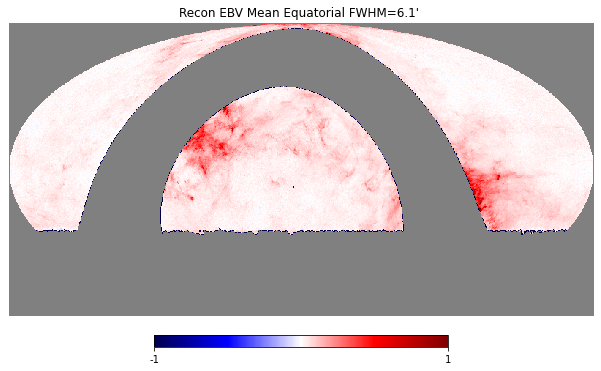

In [7]:
coordrot = coord = (['G','C']) 
nside_out = 256
aux1 = rotate_map(Recon_Mean_fw6p1_n2048,coordrot)
Recon_Mean_fw6p1_n256 = hp.ud_grade(aux1,nside_out)
hp.mollview(Recon_Mean_fw6p1_n256, cmap='seismic', min=-1.0, max=1.0, title="Recon EBV Mean Equatorial FWHM=6.1' ")

In [ ]:
coordrot = coord = (['G','C']) 
nside_out = 256
aux1 = rotate_map(Recon_Var_fw6p1_n2048,coordrot)
Recon_Var_fw6p1_n256 = hp.ud_grade(aux1,nside_out)
hp.mollview(Recon_Var_fw6p1_n256, cmap='seismic', min=-0.002, max=0.002, title="Recon EBV Mean Equatorial FWHM=6.1' ")

In [18]:
Recon_Mean_fw15_n2048 = hp.read_map('/Users/manera/desi_kp3/kp3_external_inputs/recon_fw15.fits',field=0)
Recon_Var_fw15_n2048 = hp.read_map('/Users/manera/desi_kp3/kp3_external_inputs/recon_fw15.fits',field=1)
Recon_VarCorr_fw15_n2048 = hp.read_map('/Users/manera/desi_kp3/kp3_external_inputs/recon_fw15.fits',field=2)

In [ ]:
coordrot = coord = (['G','C']) 
nside_out = 256
aux1 = rotate_map(Recon_Mean_fw15_n2048,coordrot)
Recon_Mean_fw15_n256 = hp.ud_grade(aux1,nside_out)
hp.mollview(Recon_Mean_fw15_n256, cmap='seismic', min=-1.0, max=1.0, title="Recon EBV Mean Equatorial FWHM=15' ")

In [ ]:
coordrot = coord = (['G','C']) 
nside_out = 256
aux1 = rotate_map(Recon_Var_fw15_n2048,coordrot)
Recon_Var_fw15_n256 = hp.ud_grade(aux1,nside_out)
hp.mollview(Recon_Var_fw15_n256, cmap='seismic', min=-0.0002, max=0.0002, title="Recon EBV Var Equatorial FWHM=15")

### write ring maps 

In [22]:
hp.write_map('EBVrecon_Mean_fw6p1_nside256.fits',Recon_Mean_fw6p1_n256, nest=False) 
hp.write_map('EBVrecon_Var_fw6p1_nside256.fits', Recon_Var_fw6p1_n256, nest=False) 
hp.write_map('EBVrecon_Mean_fw15_nside256.fits', Recon_Mean_fw15_n256, nest=False) 
hp.write_map('EBVrecon_Var_fw15_nside256.fits',  Recon_Var_fw15_n256, nest=False) 

setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


### I choose a mask value by hand in this case

In [22]:
mask_fw6_n256 = (Recon_Mean_fw6p1_n256 < -1.0)
mask_fw15_n256 = (Recon_Mean_fw6p1_n256 < -1.0)

In [24]:
hp.write_map('EBVrecon_Mask_fw6p1_nside256.fits',mask_fw6_n256, nest=False) 
hp.write_map('EBVrecon_Mask_fw15_nside256.fits', mask_fw15_n256, nest=False) 

setting the output map dtype to [dtype('bool')]
setting the output map dtype to [dtype('bool')]
